# Higgs Boson Detection 2024
*Searching for exotic particles in high-energy physics with machine learning*

## Overview
The goal of this competition is to classify events into two classes: events that produce the exotic Higgs Boson particle, and those that do not. Each event is a simulated particle collision represented by 28 features that describe the trajectories of decay particles. These are realistic simulations of particle collisions occuring in the ATLAS detector at the Large Hadron Collider at CERN, near Geneva, Switzerland.

An analysis like this was used to discover the Higgs Boson in 2012; a machine learning classifier was trained on simulation and calibration data, then used to analyze real data from the experiment. Improved machine learning methods for this type of data could enable physicists to make new discoveries faster. It is thought that there are additional particles yet to be discovered, so more sensitive machine learning methods could help scientists discover new physics.

## Dataset

This data set is a sample from the HIGGS data set published with [Baldi, Sadowski, and Whiteson, Searching for Exotic Particles in High-Energy Physics with Deep Learning](https://www.nature.com/articles/ncomms5308) and available [here](https://archive.ics.uci.edu/ml/datasets/HIGGS).

In [1]:
%%bash
mkdir -p data

In [2]:
!wget "https://archive.ics.uci.edu/static/public/280/higgs.zip" -P data -q --show-progress

higgs.zip               [                <=> ]   2.62G  30.1MB/s    in 1m 44s  


In [3]:
!unzip data/higgs.zip

Archive:  data/higgs.zip
  inflating: HIGGS.csv.gz            


In [4]:
!gzip -d HIGGS.csv.gz

In [5]:
!ls

data  HIGGS.csv  sample_data


In [6]:
#Load the dataset using pandas and numpy

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [7]:
column_names = ['lable', 'lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
                'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [8]:
df = pd.read_csv('HIGGS.csv', header=None, nrows=200000)
df.columns=column_names

In [9]:
df.head()

,lable,lep_pt,lep_eta,lep_phi,MET,MET_phi,jet1_pt,jet1_eta,jet1_phi,jet1_btag,...,jet4_eta,jet4_phi,jet4_btag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [10]:
features_low = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
                'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
                'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
                'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
                'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag']

features_high = ['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

features = ['lep_pt', 'lep_eta', 'lep_phi', 'MET', 'MET_phi', \
            'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_btag', \
            'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_btag', \
            'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_btag', \
            'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_btag', \
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [67]:
Y = df['lable'].values
X = df[[col for col in features]]
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

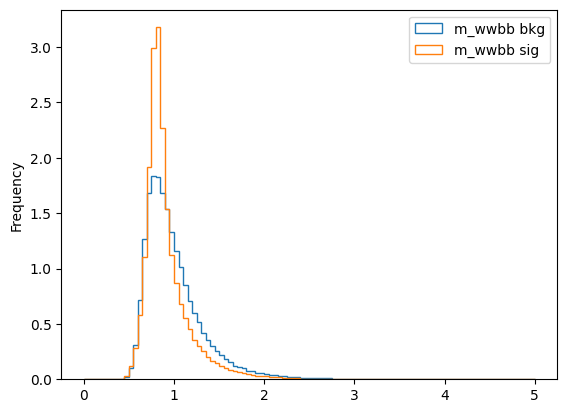

In [68]:
import matplotlib.pyplot as plt

#plot a few features
var_name = 'm_wwbb'
ax = df[df['lable']==0].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density=True)
#ax.set_yscale('log')
df[df['lable']==1].plot.hist(column=[var_name], bins=100, range=(0, 5), histtype='step', density = True, ax=ax)
ax.legend(labels=[var_name+' bkg', var_name+' sig'])

In [13]:
# Enjoy!

In [77]:
Y = df['lable'].values
X = df[[col for col in features_high]]

In [78]:
# baseline keras model
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import (
    Input,
    Activation,
    Dense,
    Convolution2D,
    MaxPooling2D,
    Dropout,
    Flatten,
)

VARS = features_high
NDIM = len(VARS)
inputs = Input(shape=(NDIM,), name="input")
outputs = Dense(1, name="output", kernel_initializer="normal", activation="sigmoid")(inputs)

# Create the model
model = Model(inputs=inputs, outputs=outputs)
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# Print the model summary
model.summary()

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input (InputLayer)              │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8 (32.00 B)

 Trainable params: 8 (32.00 B)

 Non-trainable params: 0 (0.00 B)

In [79]:
# preprocessing: standard scalar
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

In [80]:
# early stopping callback
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor="val_loss", patience=100)

In [81]:
# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint = ModelCheckpoint(
    "dense_model.h5",
    monitor="val_loss",
    verbose=0,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq="epoch",
)

In [82]:
# Train classifier
history = model.fit(
    X_train,
    Y_train,
    epochs=1000,
    batch_size=1024,
    verbose=1,
    callbacks=[early_stopping, model_checkpoint],
    validation_split=0.25,
)

Epoch 1/1000
 99/103 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5060 - loss: 0.6925

103/103 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5080 - loss: 0.6923 - val_accuracy: 0.5801 - val_loss: 0.6844
Epoch 2/1000
100/103 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5895 - loss: 0.6815

103/103 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.5897 - loss: 0.6814 - val_accuracy: 0.5974 - val_loss: 0.6785
Epoch 3/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6014 - loss: 0.6765

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.6014 - loss: 0.6764 - val_accuracy: 0.6052 - val_loss: 0.6744
Epoch 4/1000
102/103 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6097 - loss: 0.6719

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6097 - loss: 0.6719 - val_accuracy: 0.6089 - val_loss: 0.6716
Epoch 5/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6117 - loss: 0.6694

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6117 - loss: 0.6694 - val_accuracy: 0.6106 - val_loss: 0.6694
Epoch 6/1000
 97/103 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6147 - loss: 0.6672

103/103 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.6146 - loss: 0.6672 - val_accuracy: 0.6125 - val_loss: 0.6676
Epoch 7/1000
 78/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6149 - loss: 0.6659

103/103 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6148 - loss: 0.6658 - val_accuracy: 0.6132 - val_loss: 0.6660
Epoch 8/1000
 84/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6170 - loss: 0.6635

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6166 - loss: 0.6636 - val_accuracy: 0.6131 - val_loss: 0.6649
Epoch 9/1000
 98/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6151 - loss: 0.6627

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6152 - loss: 0.6628 - val_accuracy: 0.6145 - val_loss: 0.6638
Epoch 10/1000
 87/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6159 - loss: 0.6628

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6162 - loss: 0.6627 - val_accuracy: 0.6153 - val_loss: 0.6630
Epoch 11/1000
 94/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6165 - loss: 0.6625

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6167 - loss: 0.6624 - val_accuracy: 0.6162 - val_loss: 0.6624
Epoch 12/1000
 93/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6173 - loss: 0.6612

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6176 - loss: 0.6612 - val_accuracy: 0.6171 - val_loss: 0.6618
Epoch 13/1000
 80/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6224 - loss: 0.6591

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6218 - loss: 0.6594 - val_accuracy: 0.6180 - val_loss: 0.6612
Epoch 14/1000
 96/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6222 - loss: 0.6601

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6221 - loss: 0.6600 - val_accuracy: 0.6183 - val_loss: 0.6608
Epoch 15/1000
 91/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6209 - loss: 0.6599

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6211 - loss: 0.6598 - val_accuracy: 0.6186 - val_loss: 0.6605
Epoch 16/1000
 94/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6239 - loss: 0.6587

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6237 - loss: 0.6587 - val_accuracy: 0.6195 - val_loss: 0.6601
Epoch 17/1000
 93/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6241 - loss: 0.6578

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6240 - loss: 0.6579 - val_accuracy: 0.6202 - val_loss: 0.6599
Epoch 18/1000
 90/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6256 - loss: 0.6574

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6252 - loss: 0.6575 - val_accuracy: 0.6201 - val_loss: 0.6598
Epoch 19/1000
 83/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6229 - loss: 0.6579

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6230 - loss: 0.6580 - val_accuracy: 0.6209 - val_loss: 0.6598
Epoch 20/1000
 91/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6240 - loss: 0.6586

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6239 - loss: 0.6586 - val_accuracy: 0.6213 - val_loss: 0.6595
Epoch 21/1000
 93/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6226 - loss: 0.6584

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6227 - loss: 0.6584 - val_accuracy: 0.6216 - val_loss: 0.6593
Epoch 22/1000
 92/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6248 - loss: 0.6580

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6248 - loss: 0.6580 - val_accuracy: 0.6222 - val_loss: 0.6593
Epoch 23/1000
 95/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6262 - loss: 0.6567

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6260 - loss: 0.6568 - val_accuracy: 0.6215 - val_loss: 0.6592
Epoch 24/1000
 88/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6250 - loss: 0.6581

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6249 - loss: 0.6580 - val_accuracy: 0.6219 - val_loss: 0.6591
Epoch 25/1000
 93/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6228 - loss: 0.6574

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6230 - loss: 0.6574 - val_accuracy: 0.6227 - val_loss: 0.6590
Epoch 26/1000
 88/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6214 - loss: 0.6592

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6220 - loss: 0.6589 - val_accuracy: 0.6227 - val_loss: 0.6590
Epoch 27/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6244 - loss: 0.6584

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6244 - loss: 0.6584 - val_accuracy: 0.6227 - val_loss: 0.6589
Epoch 28/1000
 87/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6283 - loss: 0.6562

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6279 - loss: 0.6564 - val_accuracy: 0.6225 - val_loss: 0.6589
Epoch 29/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6250 - loss: 0.6569 - val_accuracy: 0.6229 - val_loss: 0.6590
Epoch 30/1000
101/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6259 - loss: 0.6569

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6259 - loss: 0.6569 - val_accuracy: 0.6237 - val_loss: 0.6588
Epoch 31/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6281 - loss: 0.6556 - val_accuracy: 0.6226 - val_loss: 0.6591
Epoch 32/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6246 - loss: 0.6580 - val_accuracy: 0.6229 - val_loss: 0.6589
Epoch 33/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6266 - loss: 0.6573 - val_accuracy: 0.6232 - val_loss: 0.6588
Epoch 34/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6248 - loss: 0.6580 - val_accuracy: 0.6232 - val_loss: 0.6588
Epoch 35/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6260 - loss: 0.6579 - val_accuracy: 0.6230 - val_loss: 0.6588
Epoch 36/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6248 - loss: 0.6575 - val_accuracy: 0.6229 - val_loss: 0.6589
Epoch 37/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6273 - loss: 0.6570 - val_ac

103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6259 - loss: 0.6581 - val_accuracy: 0.6241 - val_loss: 0.6587
Epoch 42/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6285 - loss: 0.6568 - val_accuracy: 0.6237 - val_loss: 0.6589
Epoch 43/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6282 - loss: 0.6566 - val_accuracy: 0.6232 - val_loss: 0.6590
Epoch 44/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6282 - loss: 0.6563 - val_accuracy: 0.6239 - val_loss: 0.6588
Epoch 45/1000
 79/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6249 - loss: 0.6582

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6253 - loss: 0.6581 - val_accuracy: 0.6246 - val_loss: 0.6587
Epoch 46/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6247 - loss: 0.6580 - val_accuracy: 0.6230 - val_loss: 0.6591
Epoch 47/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6236 - loss: 0.6587 - val_accuracy: 0.6232 - val_loss: 0.6589
Epoch 48/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6265 - loss: 0.6573 - val_accuracy: 0.6238 - val_loss: 0.6589
Epoch 49/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6251 - loss: 0.6579 - val_accuracy: 0.6237 - val_loss: 0.6588
Epoch 50/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6236 - loss: 0.6593 - val_accuracy: 0.6240 - val_loss: 0.6588
Epoch 51/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6259 - loss: 0.6571 - val_accuracy: 0.6241 - val_loss: 0.6588
Epoch 52/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6261 - loss: 0.6570 - val_ac

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6252 - loss: 0.6578 - val_accuracy: 0.6250 - val_loss: 0.6587
Epoch 57/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6255 - loss: 0.6571 - val_accuracy: 0.6236 - val_loss: 0.6590
Epoch 58/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6276 - loss: 0.6570 - val_accuracy: 0.6237 - val_loss: 0.6589
Epoch 59/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6244 - loss: 0.6589 - val_accuracy: 0.6241 - val_loss: 0.6588
Epoch 60/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6248 - loss: 0.6578 - val_accuracy: 0.6241 - val_loss: 0.6588
Epoch 61/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6271 - loss: 0.6575 - val_accuracy: 0.6242 - val_loss: 0.6588
Epoch 62/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6270 - loss: 0.6562 - val_accuracy: 0.6238 - val_loss: 0.6588
Epoch 63/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6262 - loss: 0.6580 - val_ac

103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6297 - loss: 0.6560 - val_accuracy: 0.6253 - val_loss: 0.6587
Epoch 97/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6283 - loss: 0.6566 - val_accuracy: 0.6239 - val_loss: 0.6589
Epoch 98/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6264 - loss: 0.6574 - val_accuracy: 0.6238 - val_loss: 0.6590
Epoch 99/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6266 - loss: 0.6565 - val_accuracy: 0.6243 - val_loss: 0.6588
Epoch 100/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6236 - loss: 0.6582 - val_accuracy: 0.6239 - val_loss: 0.6589
Epoch 101/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6268 - loss: 0.6570 - val_accuracy: 0.6245 - val_loss: 0.6588
Epoch 102/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6276 - loss: 0.6572 - val_accuracy: 0.6244 - val_loss: 0.6588
Epoch 103/1000
103/103 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6273 - loss: 0.6574 - va

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step


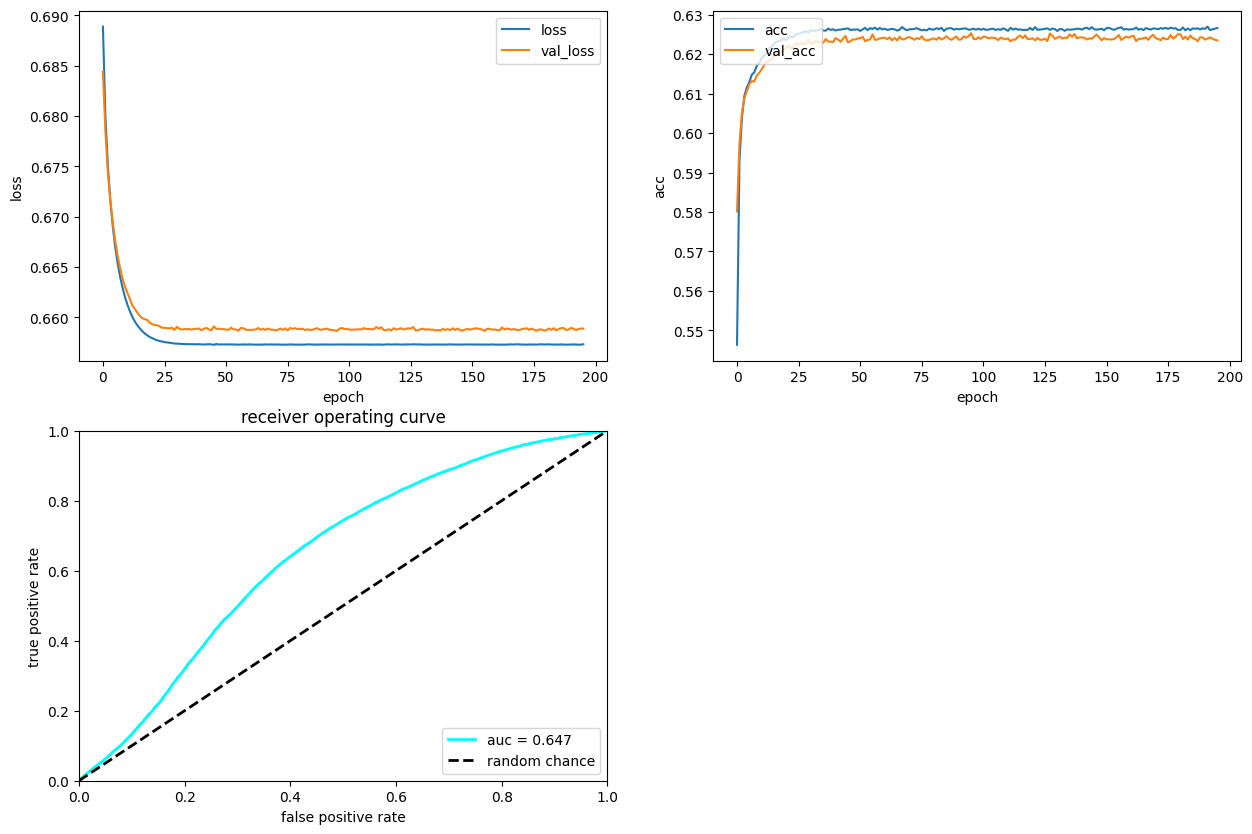

In [83]:
import matplotlib.pyplot as plt

%matplotlib inline
# plot loss vs epoch
plt.figure(figsize=(15, 10))
ax = plt.subplot(2, 2, 1)
ax.plot(history.history["loss"], label="loss")
ax.plot(history.history["val_loss"], label="val_loss")
ax.legend(loc="upper right")
ax.set_xlabel("epoch")
ax.set_ylabel("loss")

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 2)
ax.plot(history.history["accuracy"], label="acc")
ax.plot(history.history["val_accuracy"], label="val_acc")
ax.legend(loc="upper left")
ax.set_xlabel("epoch")
ax.set_ylabel("acc")

# Plot ROC
Y_predict = model.predict(X_test)
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
roc_auc = auc(fpr, tpr)
ax = plt.subplot(2, 2, 3)
ax.plot(fpr, tpr, lw=2, color="cyan", label="auc = %.3f" % (roc_auc))
ax.plot([0, 1], [0, 1], linestyle="--", lw=2, color="k", label="random chance")
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate")
ax.set_title("receiver operating curve")
ax.legend(loc="lower right")
plt.show()

In [84]:
df["dense"] = model.predict(X)  # add prediction to array
print(df.loc[:30, ["lable", "dense"]])

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step
    lable     dense
0     1.0  0.589333
1     1.0  0.666552
2     1.0  0.634063
3     0.0  0.523688
4     1.0  0.594009
5     0.0  0.573371
6     1.0  0.665470
7     1.0  0.625190
8     1.0  0.837518
9     1.0  0.586331
10    1.0  0.614905
11    0.0  0.479124
12    1.0  0.576243
13    1.0  0.656811
14    1.0  0.569280
15    0.0  0.478240
16    1.0  0.571212
17    0.0  0.299081
18    0.0  0.533929
19    1.0  0.529999
20    1.0  0.514323
21    1.0  0.677194
22    0.0  0.467864
23    1.0  0.612929
24    0.0  0.451629
25    0.0  0.643957
26    1.0  0.541670
27    0.0  0.120965
28    1.0  0.522881
29    0.0  0.617344
30    1.0  0.536546
